In [4]:
import sqlite3

In [5]:
conn=sqlite3.connect('gym_database1.db')
cursor=conn.cursor()

## Create Tables First:

#### Address Dimension

In [6]:
create_table_query1 = """ CREATE TABLE Address_Dimension
(AddressID NUMERIC PRIMARY KEY NOT NULL,
Country TXET NOT NULL,
Province TEXT NOT NULL,
City TEXT NOT NULL,
Street TEXT NOT NULL,
Postcode TEXT NOT NULL)"""
cursor.execute(create_table_query1)
conn.commit()

#### Time and Date Dimension

In [7]:
create_table_query2 = """ CREATE TABLE Time_and_Date_Dimension
(DateID NUMERIC PRIMARY KEY NOT NULL,
Time TEXT NOT NULL,
Date NUMERIC NOT NULL,
Weekday TEXT NOT NULL,
Month TEXT NOT NULL,
Year NUMERIC NOT NULL)"""
cursor.execute(create_table_query2)
conn.commit()

#### Equipment Dimension

In [8]:
create_table_query3 = """ CREATE TABLE Equipment_Dimension
(EquipmentID NUMERIC PRIMARY KEY NOT NULL,
Type TXET NOT NULL,
Manufacturer TEXT NOT NULL,
Warrenty TEXT NOT NULL,
Maintenance_Schedule TEXT NOT NULL)"""
cursor.execute(create_table_query3)
conn.commit()

#### Category Dimension

In [9]:
create_table_query4 = """ CREATE TABLE Category_Dimension
(CategoryID NUMERIC PRIMARY KEY NOT NULL,
Category_Name TEXT NOT NULL,
Subcategory TEXT NOT NULL)"""
cursor.execute(create_table_query4)
conn.commit()

#### Membership Dimension

In [10]:
create_table_query5 = """ CREATE TABLE Membership_Dimension
(MembershipID NUMERIC PRIMARY KEY NOT NULL,
AddressID NUMERIC NOT NULL,
Name TXET NOT NULL,
Age NUMERIC NOT NULL,
Sex TEXT NOT NULL,
Phone TEXT NOT NULL,
Email TEXT NOT NULL,
Date_of_birth TEXT NOT NULL,
Membership_Type TEXT NOT NULL,
Training_Session TEXT,
Bank_Account TEXT NOT NULL,
FOREIGN KEY (AddressID) REFERENCES Address_Dimension(AddressID))"""
cursor.execute(create_table_query5)
conn.commit()

#### Facility Dimension

In [11]:
create_table_query8 = """ CREATE TABLE Facility_Dimension
(FacilityID NUMERIC PRIMARY KEY NOT NULL,
AddressID NUMERIC NOT NULL,
Floor_plans TEXT,
Employee_Numbers NUMERIC NOT NULL,
FOREIGN KEY (AddressID) REFERENCES Address_Dimension(AddressID))"""
cursor.execute(create_table_query8)
conn.commit()

#### Employee Dimension

In [12]:
create_table_query6 = """ CREATE TABLE Employee_Dimension
(EmployeeID NUMERIC PRIMARY KEY NOT NULL,
Name TEXT NOT NULL,
Title TEXT NOT NULL,
Sex TEXT NOT NULL,
Date_of_birth TEXT NOT NULL,
AddressID NUMERIC NOT NULL,
FacilityID NUMERIC NOT NULL,
FOREIGN KEY (AddressID) REFERENCES Address_Dimension(AddressID)
FOREIGN KEY (FacilityID) REFERENCES Facility_Dimension(FacilityID))"""
cursor.execute(create_table_query6)
conn.commit()

#### Supplier Dimension

In [13]:
create_table_query9 = """ CREATE TABLE Supplier_Dimension
(SupplierID NUMERIC PRIMARY KEY NOT NULL,
Supplier_name TEXT NOT NULL,
Contact_person TEXT NOT NULL,
Contact_title TEXT NOT NULL,
Phone TEXT NOT NULL,
Fax TEXT NOT NULL,
Email TEXT NOT NULL,
AddressID NUMERIC NOT NULL,
FOREIGN KEY (AddressID) REFERENCES Address_Dimension(AddressID))"""
cursor.execute(create_table_query9)
conn.commit()

#### Inventory Fact Table

In [14]:
create_table_query13 = """ CREATE TABLE Inventory_Fact
(SupplierID NUMERIC NOT NULL,
ProductID NUMERIC NOT NULL,
Floor_location TEXT NOT NULL,
Volume NUMERIC NOT NULL,
Cost NUMERIC NOT NULL,
DateID NUMERIC NOT NULL,
FOREIGN KEY (DateID) REFERENCES Time_And_Date_Dimension(DateID)
FOREIGN KEY (ProductID) REFERENCES Product_Dimension(ProductID),
FOREIGN KEY (SupplierID) REFERENCES Supplier_Dimension(SupplierID))"""
cursor.execute(create_table_query13)
conn.commit()

#### Product Dimension

In [15]:
create_table_query10 = """ CREATE TABLE Product_Dimension
(ProductID NUMERIC PRIMARY KEY NOT NULL,
Name TEXT NOT NULL,
Unit_Price NUMERIC NOT NULL,
Unit_Cost NUMERIC NOT NULL,
CategoryID NUMERIC NOT NULL,
SupplierID NUMERIC NOT NULL,
FOREIGN KEY (CategoryID) REFERENCES Category_Dimension(CategoryID),
FOREIGN KEY (SupplierID) REFERENCES Inventory_Fact(SupplierID))"""
cursor.execute(create_table_query10)
conn.commit()

#### PT Sales Fact Table

In [16]:
create_table_query14 = """ CREATE TABLE PT_Sales_Fact
(MembershipID NUMERIC NOT NULL,
EmployeeID NUMERIC NOT NULL,
DateID NUMERIC NOT NULL,
Revenue NUMERIC NOT NULL,
Sessions_Sold NUMERIC NOT NULL,
FOREIGN KEY (MembershipID) REFERENCES Membership_Dimension(MembershipID),
FOREIGN KEY (EmployeeID) REFERENCES Employee_Dimension(EmployeeID),
FOREIGN KEY (DateID) REFERENCES Time_And_Date_Dimension(DateID))"""
cursor.execute(create_table_query14)
conn.commit()

#### Marketing Dimension

In [17]:
create_table_query7 = """ CREATE TABLE Marketing_Dimension
(ReferenceID NUMERIC PRIMARY KEY NOT NULL,
Campaign TEXT,
Discount TEXT NOT NULL,
Promotion TEXT,
Social_Media TEXT,
Email_Marketing TEXT,
Mail_Marketing TEXT,
EmployeeID NUMERIC NOT NULL,
FOREIGN KEY (EmployeeID) REFERENCES PT_Sales_Fact(EmployeeID))"""
cursor.execute(create_table_query7)
conn.commit()

#### Product Sales Fact Table

In [18]:
create_table_query11 = """ CREATE TABLE Product_Sales_Fact
(ProductID NUMERIC NOT NULL,
DateID NUMERIC NOT NULL,
FacilityID NUMERCI NOT NULL,
Revenue NUMERIC NOT NULL,
Net_Profit NUMERIC NOT NULL,
Cost NUMERIC NOT NULL,
Units_Sold NUMERIC NOT NULL,
FOREIGN KEY (ProductID) REFERENCES Product_Dimension(ProductID),
FOREIGN KEY (DateID) REFERENCES Time_And_Date_Dimension(DateID),
FOREIGN KEY (FacilityID) REFERENCES Facility_Dimension(FacilityID))"""
cursor.execute(create_table_query11)
conn.commit()

#### Equipment Fact Table

In [19]:
create_table_query12 = """ CREATE TABLE Equipment_Fact
(EquipmentID NUMERIC NOT NULL,
SupplierID NUMERIC NOT NULL,
FacilityID NUMERIC NOT NULL,
Usage TEXT NOT NULL,
DateID NUMERIC NOT NULL,
FOREIGN KEY (DateID) REFERENCES Time_And_Date_Dimension(DateID)
FOREIGN KEY (EquipmentID) REFERENCES Equipment_Dimension(EquipmentID),
FOREIGN KEY (SupplierID) REFERENCES Supplier_Dimension(SupplierID),
FOREIGN KEY (FacilityID) REFERENCES Facility_Dimension(FacilityID))"""
cursor.execute(create_table_query12)
conn.commit()

#### Membership Sales Fact Table

In [20]:
create_table_query15 = """ CREATE TABLE Membership_Sales_Fact
(MembershipID NUMERIC NOT NULL,
AddressID NUMERIC NOT NULL,
FacilityID NUMERIC NOT NULL,
ReferenceID NUMERIC,
DateID NUMERIC NOT NULL,
Revenue NUMERIC NOT NULL,
FOREIGN KEY (MembershipID) REFERENCES Membership_Dimension(MembershipID),
FOREIGN KEY (AddressID) REFERENCES Address_Dimension(AddressID),
FOREIGN KEY (DateID) REFERENCES Time_and_Date_Dimension(DateID),
FOREIGN KEY (FacilityID) REFERENCES Facility_Dimension(FacilityID),
FOREIGN KEY (ReferenceID) REFERENCES Marketing_Dimension(ReferenceID))"""
cursor.execute(create_table_query15)
conn.commit()

## Create Triggers

We don't know how to create triggers in python, so we just write trigger function in SQL, then paste the codes onto jupyter notebook to have a consistent view of our works:

#### Phone Number Validator:
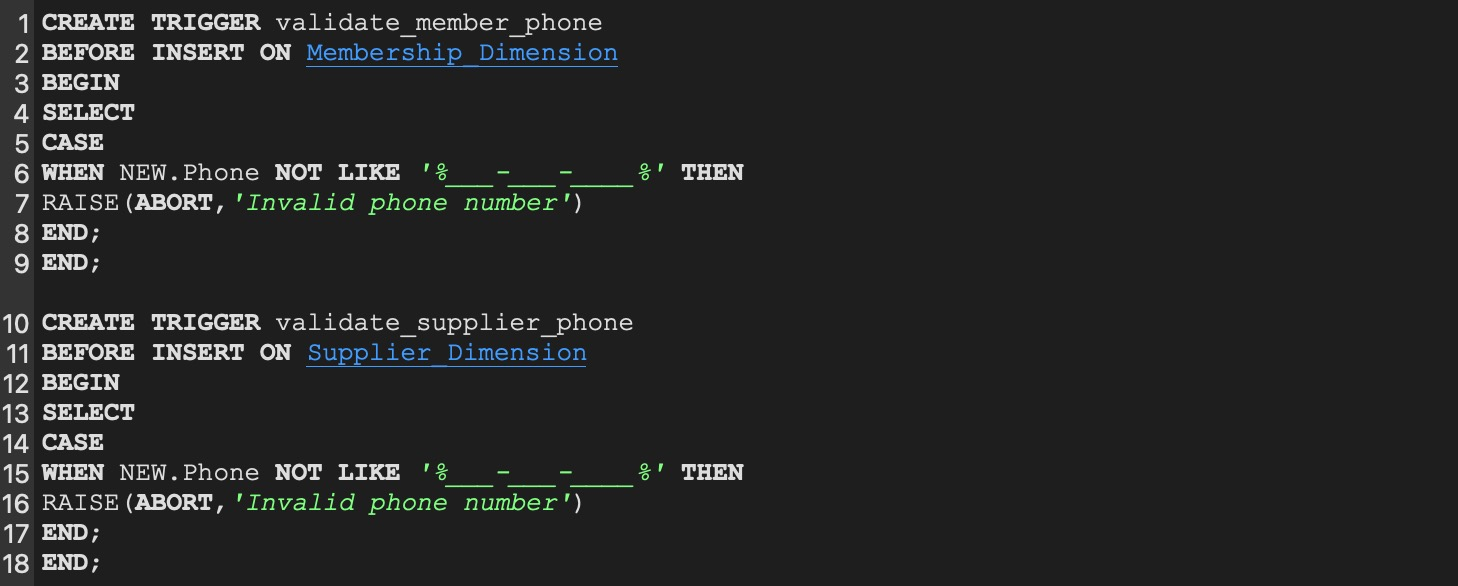

#### Email Validator:
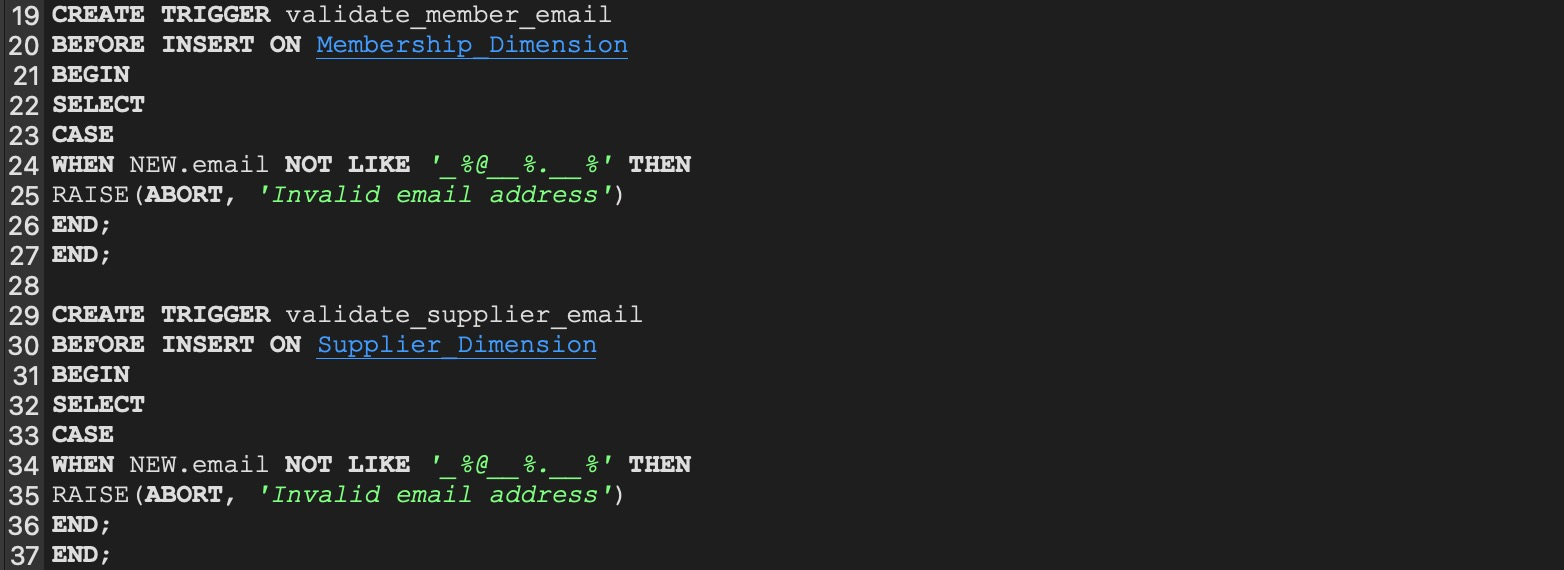

#### Birthday Validator:
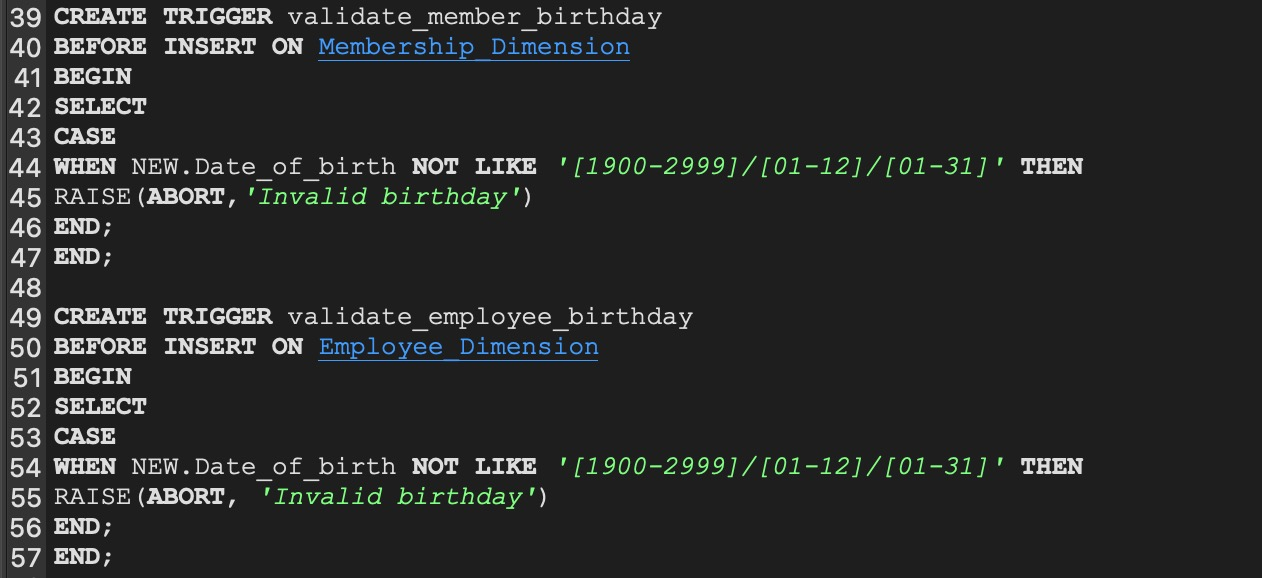

#### Bank Account Validator:
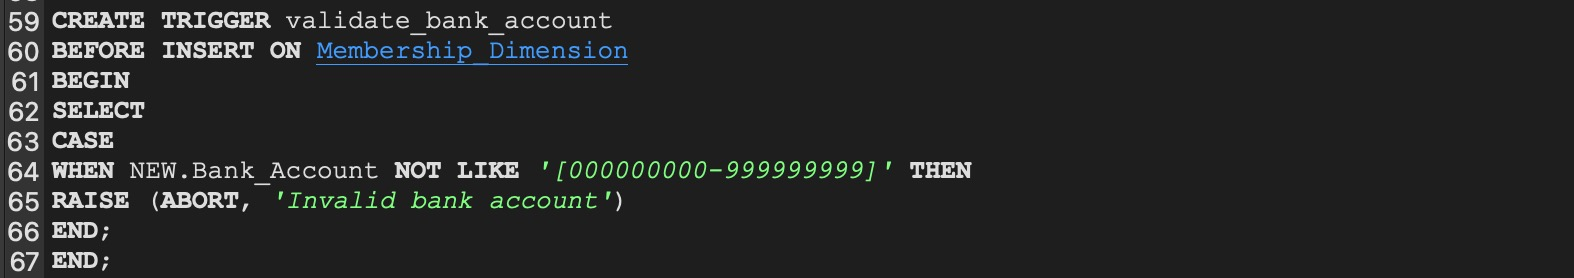

#### Postcode Validator:
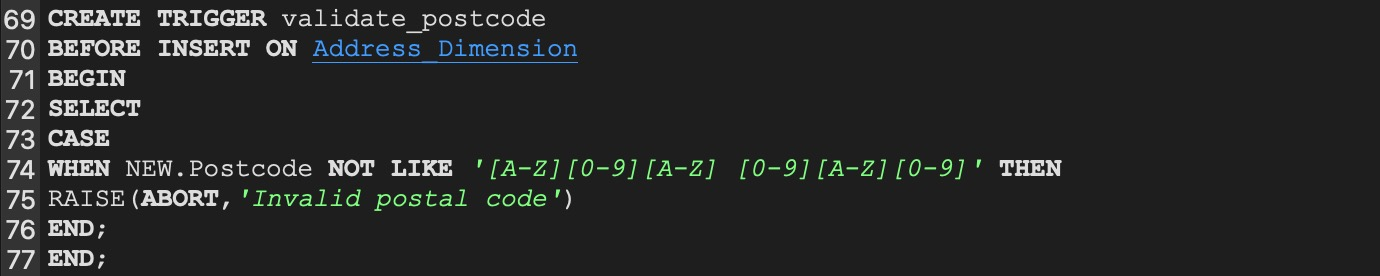

#### Fax Validator:
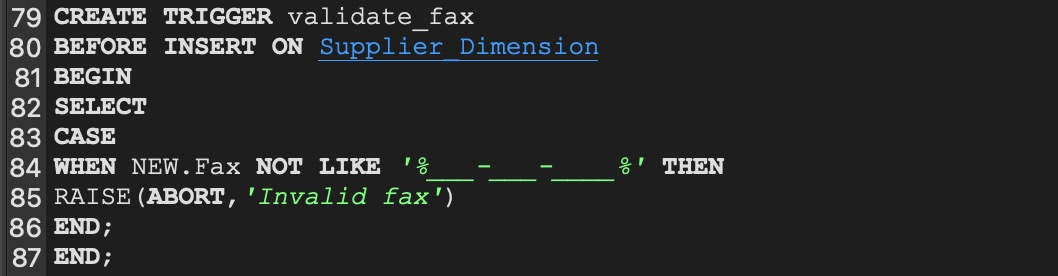

#### Time Validator:
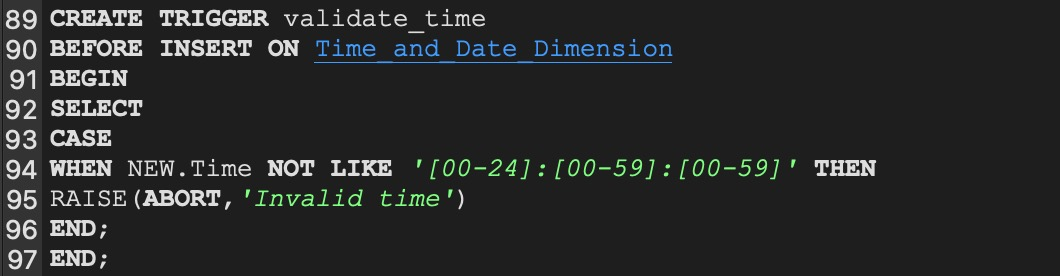

## Insert Values

#### Address Dimension Values:

In [21]:
insert_record_query1 = """ INSERT INTO Address_Dimension
(AddressID,Country,Province,City,Street,Postcode)
VALUES
(7788, 'Canada', 'ON', 'Toronto', '100 Yonge St', 'M4L 2A3'),
(1234, 'Canada', 'ON', 'Toronto', '456 Bloor St', 'M4B 2J8'),
(8877, 'Canada', 'ON', 'Burlington', '68 Sunny St', 'L7L 6P8'),
(4308, 'Canada', 'ON', 'Markham', '123 Silver Rd', 'L0H 0A1'),
(4505, 'Canada', 'ON', 'Mississauga', '123 Golden Rd', 'L4T 0J8'),
(2345, 'Canada', 'ON', 'Toronto', '101 Yonge St', 'M4L 2A4'),
(2048, 'Canada', 'ON', 'Kingston', '25 Bluemoon Circle', 'K0H 0B9'),
(3456, 'Canada', 'ON', 'Windsor', '81 West Maple Ave', 'N8X 1G6'),
(7890, 'Canada', 'ON', 'Windsor', '650 Division Rd', 'N8X 0A8'),
(2468, 'Canada', 'ON', 'Richmond Hill', '313 Main Street East', 'L4E 0C5'),
(2049, 'Canada', 'ON', 'Richmond Hill', '62 Queens St', 'L4E 1B4')"""
cursor.execute(insert_record_query1)
conn.commit() 

#### Time and Date Dimension:

In [22]:
insert_record_query2 = """ INSERT INTO Time_and_Date_Dimension
(DateID,Time,Date,Weekday,Month,Year)
VALUES
(109, '12:30:01', 28, 'Thursday', 'July', 2022),
(110, '15:13:08', 08, 'Monday', 'August', 2019),
(111, '22:35:27', 30, 'Friday', 'January', 2020),
(715, '19:37:52', 17, 'Tuesday', 'May', 2022),
(115, '17:31:48', 05, 'Monday', 'February', 2022),
(118, '10:05:37', 30, 'Saturday', 'July', 2022),
(120, '13:27:09', 01, 'Monday', 'September', 2018)"""
cursor.execute(insert_record_query2)
conn.commit()

#### Equipment Dimension:

In [23]:
insert_record_query3 = """ INSERT INTO Equipment_Dimension
(EquipmentID,Type,Manufacturer,Warrenty,Maintenance_Schedule)
VALUES
(1001, 'Treadmill', 'Horizon Fitness', 'Aug 2024', 'Monthly'),
(1005, 'Aero Bike', 'Horizon Fitness', 'Oct 2025', 'Bi-weekly')"""
cursor.execute(insert_record_query3)
conn.commit()

#### Category Dimension

In [24]:
insert_record_query4 = """ INSERT INTO Category_Dimension
(CategoryID,Category_Name,Subcategory)
VALUES
(100,'Nutrition','Protein Powder'),
(101, 'Nutrition', 'Protein Bar')"""
cursor.execute(insert_record_query4)
conn.commit()

#### Membership Dimension

In [25]:
insert_record_query5 = """ INSERT INTO Membership_Dimension
(MembershipID,AddressID,Name,Age,Sex,Phone,Email,Date_of_birth,Membership_Type,Training_Session,Bank_Account)
VALUES
(131,2345,'Vincent White',23,'Male','365-888-6262','Vincent123@hotmail.com','1999/08/22','Premium',
'Every Tuesday 20:00','97862165'),
(135,2468,'Miya Franklin',21,'Female','645-965-0914','MF0308@gmail.com','2001/03/08','Premium',
'Every Sunday 15:00','29283897')"""
cursor.execute(insert_record_query5)
conn.commit()

In [26]:
insert_record_query6 = """ INSERT INTO Membership_Dimension
(MembershipID,AddressID,Name,Age,Sex,Phone,Email,Date_of_birth,Membership_Type,Bank_Account)
VALUES
(130,1234,'Rowan Russell',20,'Male','265-532-8356','Rowan02@gmail.com','2002/02/02','Basic','72291010'),
(132,3456,'Mason Paul',47,'Male','909-756-3836','Masonmason@gmail.com','1975/06/05','Basic','71161200')"""
cursor.execute(insert_record_query6)
conn.commit()

#### Facility Dimension

In [27]:
insert_record_query7 = """ INSERT INTO Facility_Dimension
(FacilityID,AddressID,Employee_Numbers)
VALUES
(733,7788,100),
(848,8877,97),
(513,7890,108)"""
cursor.execute(insert_record_query7)
conn.commit()

#### Employee Dimension

In [28]:
insert_record_query8 = """ INSERT INTO Employee_Dimension
(EmployeeID,Name,Title,Sex,Date_of_birth,AddressID,FacilityID)
VALUES
(105,'Steve Mayo','Personal Trainer','Male','1993/05/20',2048,733),
(108,'Lucy Fox','Yoga Teacher','Female','1995/12/08',2049,733)"""
cursor.execute(insert_record_query8)
conn.commit()

#### Supplier Dimension

In [29]:
insert_record_query9 = """ INSERT INTO Supplier_Dimension
(SupplierID,Supplier_name,Contact_person,Contact_title,Phone,Fax,Email,AddressID)
VALUES
(2002,'Best Protein','Jessie Parrish','Sales Representative','311-469-8747','311-469-8748',
'JessieP@outlook.com',4505),
(2001,'Cardi Canada','Kelvin Benson','Sales Manager','904-540-6103','904-540-6104',
'Cardi.Canada@gmail.com',4308)"""
cursor.execute(insert_record_query9)
conn.commit()

#### Inventory Fact Table

In [30]:
insert_record_query10 = """ INSERT INTO Inventory_Fact
(SupplierID,ProductID,Floor_location,Volume,Cost,DateID)
VALUES
(2002,208,'Storage Room',20,899.8,109),
(2002,308,'Storage Room',100,99,109)"""
cursor.execute(insert_record_query10)
conn.commit()

#### Product Dimension

In [31]:
insert_record_query11 = """ INSERT INTO Product_Dimension
(ProductID,Name,Unit_Price,Unit_Cost,CategoryID,SupplierID)
VALUES
(208,'Good Whey Protein',84.99,44.99,100,2002),
(308,'RXBAR',2.99,0.99,101,2002)"""
cursor.execute(insert_record_query11)
conn.commit()

#### PT Sales Fact Table

In [32]:
insert_record_query12 = """ INSERT INTO PT_Sales_Fact
(MembershipID,EmployeeID,DateID,Revenue,Sessions_Sold)
VALUES
(131,105,111,3000,30),
(135,108,120,750,15)"""
cursor.execute(insert_record_query12)
conn.commit()

#### Marketing Dimension

In [33]:
insert_record_query13 = """ INSERT INTO Marketing_Dimension
(ReferenceID,Discount,Promotion,Mail_Marketing,EmployeeID)
VALUES
(1113,'20%','Winter Promotion','Mailing Flyer',105)"""
cursor.execute(insert_record_query13)
conn.commit()

In [34]:
insert_record_query14 = """ INSERT INTO Marketing_Dimension
(ReferenceID,Discount,Promotion,Social_Media,EmployeeID)
VALUES
(1513,'15%','Back To School Promotion','Tiktok Videos',108)"""
cursor.execute(insert_record_query14)
conn.commit()

#### Product Sales Fact Table

In [35]:
insert_record_query15 = """ INSERT INTO Product_Sales_Fact
(ProductID,DateID,FacilityID,Revenue,Net_Profit,Cost,Units_Sold)
VALUES
(208, 109, 733, 84.99, 40, 44.99, 1),
(308, 118, 733, 59.8, 40, 19.8, 20)"""
cursor.execute(insert_record_query15)
conn.commit()

#### Equipment Fact Table

In [36]:
insert_record_query16 = """ INSERT INTO Equipment_Fact
(EquipmentID,SupplierID,FacilityID,Usage,DateID)
VALUES
(1001, 2001, 848, '85%', 110),
(1005, 2001, 848, '15%', 115)"""
cursor.execute(insert_record_query16)
conn.commit()

#### Membership Sales Fact Table

In [37]:
insert_record_query17 = """ INSERT INTO Membership_Sales_Fact
(MembershipID,AddressID,FacilityID,ReferenceID,DateID,Revenue)
VALUES
(132, 3456, 513, 1113, 715, 79.99),
(135, 2468, 513, 1513, 789, 79.99)"""
cursor.execute(insert_record_query17)
conn.commit()

## ETL Pipeline

We use faker to create random data about time and date, because it is kind of hard for us to find json files online:

In [44]:
!pip install Faker

In [45]:
from faker import Faker
import pandas as pd
fake = Faker()

In [46]:
time=pd.DataFrame([fake.time() for i in range(15)],columns=['Time'])
date=pd.DataFrame([fake.day_of_month() for i in range(15)],columns=['Date'])
weekday=pd.DataFrame([fake.day_of_week() for i in range(15)],columns=['Weekday'])
month=pd.DataFrame([fake.month_name() for i in range(15)],columns=['Month'])
year=pd.DataFrame([fake.year() for i in range(15)],columns=['Year'])
df=pd.concat([time,date,weekday,month,year],axis=1)
df

,Time,Date,Weekday,Month,Year
0,23:02:42,01,Tuesday,May,2005
1,13:48:56,03,Sunday,March,1992
2,14:25:54,21,Tuesday,January,2022
3,19:30:00,09,Wednesday,December,2000
4,08:21:52,06,Wednesday,May,1984
5,23:11:33,20,Tuesday,October,2003
6,09:46:10,27,Tuesday,December,2020
7,19:26:00,04,Thursday,July,2007
8,11:16:22,27,Thursday,November,2010
9,19:02:35,28,Monday,April,1986


Now that we have a dataframe, we need to start putting data in a format to create tables in a data base. This dataframe is created to insert into Time_and_date dimension table, but before we inserting into tables, make sure we have met all requirements: NOLL NULL columns, primary keys, no duplicate values, etc.

In [47]:
timedate_dimension=df.drop_duplicates()

In [48]:
timedate_dimension['DateID']=timedate_dimension.groupby(['Year','Month','Date','Time']).ngroup()

In [49]:
timedate_dimension=timedate_dimension[['DateID','Time','Date','Weekday','Month','Year']] # re-ordering the columns
timedate_dimension

,DateID,Time,Date,Weekday,Month,Year
0,8,23:02:42,01,Tuesday,May,2005
1,4,13:48:56,03,Sunday,March,1992
2,14,14:25:54,21,Tuesday,January,2022
3,5,19:30:00,09,Wednesday,December,2000
4,1,08:21:52,06,Wednesday,May,1984
5,7,23:11:33,20,Tuesday,October,2003
6,13,09:46:10,27,Tuesday,December,2020
7,9,19:26:00,04,Thursday,July,2007
8,11,11:16:22,27,Thursday,November,2010
9,2,19:02:35,28,Monday,April,1986


We already created time_and_date dimension, so we dont need to create again

In [50]:
timedate_dimension['DateID'] = timedate_dimension['DateID'].astype(str)

In [51]:
def insert_records(recordList):
    insert_record_query = """INSERT INTO Time_and_Date_Dimension (DateID,Time,Date,Weekday,Month,Year)
                            VALUES (?,?,?,?,?,?)"""
    cursor.executemany(insert_record_query, recordList)
    conn.commit()
    print('New data inserted successfully')

In [52]:
insert_list = timedate_dimension.to_records(index=False)

In [53]:
insert_records(insert_list)

New data inserted successfully
